In [1]:
# Cell 1: Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import warnings
import networkx as nx
warnings.filterwarnings('ignore')

# Load your data
csv_file_path = 'data/results.csv'  # Update path
df = pd.read_csv(csv_file_path, delimiter=';', encoding='utf-8')

# Role combinations


In [2]:


# Define role columns based on your SPSS file
role_columns = [
    'Role_type.1',  # Kraftsystemanalytiker
    'Role_type.2',  # Nettplanlegger
    'Role_type.3',  # Tilknytningsansvarlig
    'Role_type.4',  # Driftsplanlegger
    'Role_type.5',  # Driftskoordinator
    'Role_type.6',  # Driftsoperatør
    'Role_type.7',  # Feil- og hendelsesanalytiker
    'Role_type.8'   # Annet
]

# Role descriptions from your SPSS file
role_descriptions = {
    'Role_type.1': 'Kraftsystemanalytiker (lastflyt, kortslutning, dynamiske analyser)',
    'Role_type.2': 'Nettplanlegger (konseptvalg, tilknytningssaker, områdeplaner)',
    'Role_type.3': 'Tilknytningsansvarlig (kundehenvendelser, kapasitetsvurderinger)',
    'Role_type.4': 'Driftsplanlegger (revisjonsplanlegging, koblingsanalyser)',
    'Role_type.5': 'Driftskoordinator (driftsstanser, omkoblinger)',
    'Role_type.6': 'Driftsoperatør (overvåking, hendelseshåndtering)',
    'Role_type.7': 'Feil- og hendelsesanalytiker',
    'Role_type.8': 'Annet (spesifiser)'
}

# Short names for visualization
role_short_names = {
    'Role_type.1': 'System Analyst',
    'Role_type.2': 'Network Planner',
    'Role_type.3': 'Connection Manager',
    'Role_type.4': 'Operations Planner',
    'Role_type.5': 'Operations Coordinator',
    'Role_type.6': 'Operations Operator',
    'Role_type.7': 'Incident Analyst',
    'Role_type.8': 'Other'
}

print(f"Dataset shape: {df.shape}")
print(f"Role columns to analyze: {len(role_columns)}")


Dataset shape: (24, 231)
Role columns to analyze: 8


In [3]:
# Cell 2: Basic role distribution analysis
def analyze_role_distribution(df, role_columns, role_descriptions):
    """
    Analyze individual role distribution
    """
    print("="*80)
    print("INDIVIDUAL ROLE DISTRIBUTION")
    print("="*80)
    
    role_counts = {}
    for role in role_columns:
        if role in df.columns:
            count = df[role].sum()
            percentage = (count / len(df)) * 100
            role_counts[role] = count
            print(f"{role}: {count} respondents ({percentage:.1f}%)")
            print(f"  {role_descriptions[role]}")
            print()
    
    return role_counts

# Analyze individual roles
role_counts = analyze_role_distribution(df, role_columns, role_descriptions)


INDIVIDUAL ROLE DISTRIBUTION
Role_type.1: 12 respondents (50.0%)
  Kraftsystemanalytiker (lastflyt, kortslutning, dynamiske analyser)

Role_type.2: 11 respondents (45.8%)
  Nettplanlegger (konseptvalg, tilknytningssaker, områdeplaner)

Role_type.3: 9 respondents (37.5%)
  Tilknytningsansvarlig (kundehenvendelser, kapasitetsvurderinger)

Role_type.4: 3 respondents (12.5%)
  Driftsplanlegger (revisjonsplanlegging, koblingsanalyser)

Role_type.5: 4 respondents (16.7%)
  Driftskoordinator (driftsstanser, omkoblinger)

Role_type.6: 5 respondents (20.8%)
  Driftsoperatør (overvåking, hendelseshåndtering)

Role_type.7: 5 respondents (20.8%)
  Feil- og hendelsesanalytiker

Role_type.8: 3 respondents (12.5%)
  Annet (spesifiser)



In [6]:
# Cell: Fixed co-occurrence matrix calculation
def calculate_clean_co_occurrence(df, role_columns, role_short_names):
    """
    Calculate co-occurrence matrix with proper data cleaning
    """
    print("=== CLEANING ROLE DATA FOR CO-OCCURRENCE ===")
    
    # Step 1: Select only role columns that exist
    existing_role_columns = [col for col in role_columns if col in df.columns]
    print(f"Found {len(existing_role_columns)} role columns")
    
    # Step 2: Clean the data
    role_df_clean = df[existing_role_columns].copy()
    
    # Convert to numeric, coerce errors to NaN
    for col in existing_role_columns:
        role_df_clean[col] = pd.to_numeric(role_df_clean[col], errors='coerce')
    
    # Fill NaN values with 0 (assuming missing = No)
    role_df_clean = role_df_clean.fillna(0)
    
    # Ensure values are 0 or 1 only
    role_df_clean = role_df_clean.clip(0, 1).astype(int)
    
    print(f"Cleaned data shape: {role_df_clean.shape}")
    print(f"Data types after cleaning: {role_df_clean.dtypes.unique()}")
    
    # Step 3: Calculate co-occurrence matrix
    try:
        co_occurrence = role_df_clean.T.dot(role_df_clean)
        
        # Convert to DataFrame with proper labels
        co_occurrence_df = pd.DataFrame(
            co_occurrence.values,
            index=[role_short_names.get(col, col) for col in existing_role_columns],
            columns=[role_short_names.get(col, col) for col in existing_role_columns]
        )
        
        # Check for NaN values
        nan_count = co_occurrence_df.isnull().sum().sum()
        print(f"NaN values in co-occurrence matrix: {nan_count}")
        
        if nan_count == 0:
            print("✅ Co-occurrence matrix calculated successfully!")
        else:
            print("❌ Still have NaN values - need further investigation")
            
        return role_df_clean, co_occurrence_df
        
    except Exception as e:
        print(f"Error calculating co-occurrence matrix: {e}")
        return role_df_clean, None

# Calculate cleaned co-occurrence matrix
role_df, co_occurrence_df = calculate_clean_co_occurrence(
    df, role_columns, role_short_names
)

if co_occurrence_df is not None:
    print("\nCleaned Co-occurrence Matrix:")
    print(co_occurrence_df)


=== CLEANING ROLE DATA FOR CO-OCCURRENCE ===
Found 8 role columns
Cleaned data shape: (24, 8)
Data types after cleaning: [dtype('int64')]
NaN values in co-occurrence matrix: 0
✅ Co-occurrence matrix calculated successfully!

Cleaned Co-occurrence Matrix:
                        System Analyst  Network Planner  Connection Manager  \
System Analyst                      12                9                   7   
Network Planner                      9               11                   6   
Connection Manager                   7                6                   9   
Operations Planner                   1                0                   0   
Operations Coordinator               1                0                   0   
Operations Operator                  1                1                   0   
Incident Analyst                     3                1                   2   
Other                                0                0                   0   

                        Operation

In [7]:
# Cell 4: Identify most and least common role combinations
def identify_role_combinations(role_df, role_columns, role_short_names):
    """
    Identify specific role combinations that are common or rare
    """
    print("\n" + "="*80)
    print("SPECIFIC ROLE COMBINATION PATTERNS")
    print("="*80)
    
    # Find all possible pairs of roles
    role_pairs = list(combinations(role_columns, 2))
    
    pair_combinations = []
    
    for role1, role2 in role_pairs:
        # Count how many respondents have both roles
        both_roles = ((role_df[role1] == 1) & (role_df[role2] == 1)).sum()
        
        # Count individual roles
        role1_only = (role_df[role1] == 1).sum()
        role2_only = (role_df[role2] == 1).sum()
        
        # Calculate conditional probability
        if role1_only > 0:
            prob_role2_given_role1 = both_roles / role1_only
        else:
            prob_role2_given_role1 = 0
            
        if role2_only > 0:
            prob_role1_given_role2 = both_roles / role2_only
        else:
            prob_role1_given_role2 = 0
        
        pair_combinations.append({
            'role1': role_short_names[role1],
            'role2': role_short_names[role2],
            'both_count': both_roles,
            'role1_total': role1_only,
            'role2_total': role2_only,
            'prob_role2_given_role1': prob_role2_given_role1,
            'prob_role1_given_role2': prob_role1_given_role2,
            'avg_conditional_prob': (prob_role2_given_role1 + prob_role1_given_role2) / 2
        })
    
    # Convert to DataFrame and sort by combination frequency
    combinations_df = pd.DataFrame(pair_combinations)
    combinations_df = combinations_df.sort_values('both_count', ascending=False)
    
    print(f"🔥 MOST COMMON ROLE COMBINATIONS:")
    top_combinations = combinations_df.head(10)
    for idx, row in top_combinations.iterrows():
        print(f"  {row['role1']} + {row['role2']}: {int(row['both_count'])} respondents")
        print(f"    Conditional probability: {row['avg_conditional_prob']:.2f}")
    
    print(f"\n❄️  LEAST COMMON ROLE COMBINATIONS:")
    bottom_combinations = combinations_df[combinations_df['both_count'] == 0]
    if len(bottom_combinations) > 0:
        print(f"  {len(bottom_combinations)} role pairs never appear together:")
        for idx, row in bottom_combinations.head(10).iterrows():
            print(f"    {row['role1']} + {row['role2']}: 0 respondents")
    else:
        print("  All role pairs have at least one respondent with both roles")
    
    return combinations_df

# Identify specific combinations
combinations_df = identify_role_combinations(role_df, role_columns, role_short_names)



SPECIFIC ROLE COMBINATION PATTERNS
🔥 MOST COMMON ROLE COMBINATIONS:
  System Analyst + Network Planner: 9 respondents
    Conditional probability: 0.78
  System Analyst + Connection Manager: 7 respondents
    Conditional probability: 0.68
  Network Planner + Connection Manager: 6 respondents
    Conditional probability: 0.61
  System Analyst + Incident Analyst: 3 respondents
    Conditional probability: 0.42
  Operations Coordinator + Operations Operator: 3 respondents
    Conditional probability: 0.68
  Operations Planner + Operations Coordinator: 3 respondents
    Conditional probability: 0.88
  Connection Manager + Incident Analyst: 2 respondents
    Conditional probability: 0.31
  Operations Planner + Operations Operator: 2 respondents
    Conditional probability: 0.53
  Operations Coordinator + Incident Analyst: 2 respondents
    Conditional probability: 0.45
  Operations Planner + Incident Analyst: 2 respondents
    Conditional probability: 0.53

❄️  LEAST COMMON ROLE COMBINATIO

In [8]:
# Cell 5: Statistical analysis of role associations
def analyze_role_correlations(role_df, role_columns, role_short_names):
    """
    Analyze statistical correlations between roles
    """
    print("\n" + "="*80)
    print("ROLE CORRELATION ANALYSIS")
    print("="*80)
    
    # Calculate correlation matrix
    correlation_matrix = role_df[role_columns].corr()
    
    # Convert to use short names
    correlation_df = pd.DataFrame(correlation_matrix.values,
                                 index=[role_short_names[col] for col in role_columns],
                                 columns=[role_short_names[col] for col in role_columns])
    
    print(f"📈 ROLE CORRELATION MATRIX:")
    print(correlation_df.round(3))
    
    # Find strongest positive correlations (excluding diagonal)
    correlations_list = []
    for i in range(len(role_columns)):
        for j in range(i+1, len(role_columns)):
            role1 = role_columns[i]
            role2 = role_columns[j]
            corr_val = correlation_matrix.iloc[i, j]
            
            correlations_list.append({
                'role1': role_short_names[role1],
                'role2': role_short_names[role2],
                'correlation': corr_val
            })
    
    # Sort by correlation strength
    correlations_df = pd.DataFrame(correlations_list)
    correlations_df = correlations_df.sort_values('correlation', ascending=False)
    
    print(f"\n🔗 STRONGEST POSITIVE CORRELATIONS:")
    strong_positive = correlations_df[correlations_df['correlation'] > 0.2].head(10)
    for idx, row in strong_positive.iterrows():
        print(f"  {row['role1']} ↔ {row['role2']}: {row['correlation']:.3f}")
    
    print(f"\n🚫 STRONGEST NEGATIVE CORRELATIONS:")
    strong_negative = correlations_df[correlations_df['correlation'] < -0.1].tail(10)
    for idx, row in strong_negative.iterrows():
        print(f"  {row['role1']} ↔ {row['role2']}: {row['correlation']:.3f}")
    
    return correlation_df, correlations_df

# Analyze correlations
correlation_df, correlations_df = analyze_role_correlations(role_df, role_columns, role_short_names)




ROLE CORRELATION ANALYSIS
📈 ROLE CORRELATION MATRIX:
                        System Analyst  Network Planner  Connection Manager  \
System Analyst                   1.000            0.585               0.430   
Network Planner                  0.585            1.000               0.324   
Connection Manager               0.430            0.324               1.000   
Operations Planner              -0.126           -0.348              -0.293   
Operations Coordinator          -0.224           -0.411              -0.346   
Operations Operator             -0.308           -0.266              -0.397   
Incident Analyst                 0.103           -0.266               0.026   
Other                           -0.378           -0.348              -0.293   

                        Operations Planner  Operations Coordinator  \
System Analyst                      -0.126                  -0.224   
Network Planner                     -0.348                  -0.411   
Connection Manager      

## Some minor errors
Aspect	    Before Cleaning	    After Cleaning
Sub-alternatives	    All respondents could answer sub-questions regardless of main decision	    Only respondents who checked main decision can have sub-alternatives
Involvement Scale	    1=High, 5=Low (counterintuitive)	    5=High, 1=Low (intuitive)


In [19]:
# Cell 1: Fix Sub-alternatives Logic
def fix_subalternatives_logic(df):
    """
    Set sub-alternatives to 0 for respondents who didn't check the main decision type
    """
    # Define mapping of main decisions to their sub-alternatives
    sub_alternatives_map = {
        'decision_type.1': [
            'decision_type1_subtype.1', 'decision_type1_subtype.2', 
            'decision_type1_subtype.3', 'decision_type1_subtype.4'
        ],
        'decision_type.2': [
            'decision_type2_subtype.1', 'decision_type2_subtype.2', 
            'decision_type2_subtype.3', 'decision_type2_subtype.4'
        ],
        'decision_type.3': [
            'decision_type3_subtype.1', 'decision_type3_subtype.2', 
            'decision_type3_subtype.3', 'decision_type3_subtype.4',
            'decision_type3_subtype.5', 'decision_type3_subtype.6'
        ],
        'decision_type.4': [
            'decision_type4_subtype.1', 'decision_type4_subtype.2', 
            'decision_type4_subtype.3', 'decision_type4_subtype.4',
            'decision_type4_subtype.5'
        ]
    }
    
    df_fixed = df.copy()
    
    # For each main decision type, set sub-alternatives to 0 if main decision is not checked
    for main_decision, sub_cols in sub_alternatives_map.items():
        if main_decision in df_fixed.columns:
            # Create mask for respondents who did NOT check the main decision
            mask_not_involved = df_fixed[main_decision] == 0
            
            # Set all sub-alternatives to 0 for these respondents
            for sub_col in sub_cols:
                if sub_col in df_fixed.columns:
                    df_fixed.loc[mask_not_involved, sub_col] = 0
                    
    print("✅ Sub-alternatives logic fixed:")
    print("   • Only respondents who checked main decision types will have sub-alternatives")
    print("   • Decision types 5, 6, and 7 remain unchanged (no sub-levels)")
    
    return df_fixed, sub_alternatives_map


In [20]:
# Cell 2: Fix Inverted Involvement Scale
def fix_involvement_scale(df):
    """
    Invert the involvement scale to match questionnaire text:
    Original: 1=High Responsibility, 5=No Involvement
    Fixed: 5=High Responsibility, 1=No Involvement
    """
    involvement_columns = [
        'decision_type1_involvement.level',
        'decision_type2_involvement.level', 
        'decision_type3_involvement.level',
        'decision_type4_involvement.level',
        'decision_type5_involvement.level',
        'decision_type6_involvement.level'
    ]
    
    df_fixed = df.copy()
    
    # Invert scale: new_value = (max_value + min_value) - old_value
    # For 1-5 scale: new_value = 6 - old_value
    for col in involvement_columns:
        if col in df_fixed.columns:
            df_fixed[col] = 6 - df_fixed[col]
    
    print("✅ Involvement scale corrected:")
    print("   • 5 = Fully Responsible (Selvstendig ansvarlig)")
    print("   • 4 = Partially Responsible (Delvis ansvarlig)")
    print("   • 3 = Moderately Involved (Moderat involvert)")
    print("   • 2 = Minimally Involved (Minimalt involvert)")
    print("   • 1 = Not Involved (Ikke involvert)")
    
    return df_fixed, involvement_columns


In [21]:
# Cell 3: Complete Data Cleaning Pipeline
def clean_questionnaire_data(df):
    """
    Apply both fixes to the questionnaire data
    """
    print("🔧 Starting questionnaire data cleaning...")
    print(f"Original dataset shape: {df.shape}")
    
    # Step 1: Fix sub-alternatives logic
    df_step1, sub_map = fix_subalternatives_logic(df)
    
    # Step 2: Fix involvement scale
    df_cleaned, inv_cols = fix_involvement_scale(df_step1)
    
    # Validation: Check for data consistency
    print("\n📊 DATA VALIDATION:")
    
    # Check sub-alternatives consistency
    for main_decision, sub_cols in sub_map.items():
        if main_decision in df_cleaned.columns:
            main_yes = (df_cleaned[main_decision] == 1).sum()
            
            # Count non-zero sub-alternatives
            sub_responses = 0
            for sub_col in sub_cols:
                if sub_col in df_cleaned.columns:
                    sub_responses += (df_cleaned[sub_col] == 1).sum()
            
            print(f"   • {main_decision}: {main_yes} main responses, {sub_responses} total sub-responses")
    
    # Check involvement scale distribution
    print("\n📈 INVOLVEMENT SCALE DISTRIBUTION (after correction):")
    for col in inv_cols:
        if col in df_cleaned.columns:
            dist = df_cleaned[col].value_counts().sort_index()
            print(f"   • {col}: {dict(dist)}")
    
    print(f"\n✅ Data cleaning complete. Final dataset shape: {df_cleaned.shape}")
    
    return df_cleaned

# Apply the cleaning to your data
df_cleaned = clean_questionnaire_data(df)


🔧 Starting questionnaire data cleaning...
Original dataset shape: (24, 231)
✅ Sub-alternatives logic fixed:
   • Only respondents who checked main decision types will have sub-alternatives
   • Decision types 5, 6, and 7 remain unchanged (no sub-levels)
✅ Involvement scale corrected:
   • 5 = Fully Responsible (Selvstendig ansvarlig)
   • 4 = Partially Responsible (Delvis ansvarlig)
   • 3 = Moderately Involved (Moderat involvert)
   • 2 = Minimally Involved (Minimalt involvert)
   • 1 = Not Involved (Ikke involvert)

📊 DATA VALIDATION:
   • decision_type.1: 15 main responses, 29 total sub-responses
   • decision_type.2: 9 main responses, 20 total sub-responses
   • decision_type.3: 18 main responses, 55 total sub-responses
   • decision_type.4: 14 main responses, 37 total sub-responses

📈 INVOLVEMENT SCALE DISTRIBUTION (after correction):
   • decision_type1_involvement.level: {1: np.int64(1), 2: np.int64(2), 3: np.int64(11), 4: np.int64(2), 5: np.int64(8)}
   • decision_type2_involve

# Descisions and role combinations

In [22]:
# Reuse role_columns and decision_columns from previous analysis


decision_columns = [
    'decision_type.1',  # Tilknytninger og kundehenvendelser
    'decision_type.2',  # Driftsplanlegging og koblingsbilder
    'decision_type.3',  # Nettplanlegging og prosjektering
    'decision_type.4',  # Fastsettelse av grenseverdier
    'decision_type.5',  # Metode- eller modellutvikling
    'decision_type.6',  # Annet
    'decision_type.7'   # Ingen av disse
]

# NEW: Define involvement level columns (degree of involvement)
involvement_columns = [
    'decision_type1_involvement.level',  # Tilknytninger og kundehenvendelser
    'decision_type2_involvement.level',  # Driftsplanlegging og koblingsbilder
    'decision_type3_involvement.level',  # Nettplanlegging og prosjektering
    'decision_type4_involvement.level',  # Fastsettelse av grenseverdier
    'decision_type5_involvement.level',  # Metode- eller modellutvikling
    'decision_type6_involvement.level'   # Øvrige relevante beslutningsprosesser
]

# Decision labels from SPSS file
decision_labels = {
    'decision_type.1': 'Tilknytninger og kundehenvendelser',
    'decision_type.2': 'Driftsplanlegging og koblingsbilder',
    'decision_type.3': 'Nettplanlegging og prosjektering',
    'decision_type.4': 'Fastsettelse av grenseverdier',
    'decision_type.5': 'Metode- eller modellutvikling',
    'decision_type.6': 'Annet',
    'decision_type.7': 'Ingen av disse'
}

# Short decision names for visualizations
decision_short_names = {
    'decision_type.1': 'Customer Connections',
    'decision_type.2': 'Operations Planning',
    'decision_type.3': 'Network Planning',
    'decision_type.4': 'Limit Setting',
    'decision_type.5': 'Method Development',
    'decision_type.6': 'Other',
    'decision_type.7': 'None of These'
}

#Involvement level labels (from SPSS file)

involvement_labels = {
    5: 'Fully Responsible',      # 5. Selvstendig ansvarlig / Hovedansvarlig
    4: 'Partially Responsible',  # 4: Delvis ansvarlig /Utførende
    3: 'Moderately Involved',    # 3: Moderat involvert /Konsulteres
    2: 'Minimally Involved',     # 2: Minimalt involvert/Informeres
    1: 'Not Involved'            # 1: Ikke involvert / Ikke relevant
}


print(f"Dataset shape: {df.shape}")
print(f"Role columns: {len(role_columns)}")
print(f"Decision columns: {len(decision_columns)}")
print(f"Involvement level columns: {len(involvement_columns)}")

Dataset shape: (24, 231)
Role columns: 8
Decision columns: 7
Involvement level columns: 6


In [23]:
# Cell 2: Clean and prepare enhanced role-decision data (CORRECTED)
def prepare_enhanced_role_decision_data(df, role_columns, decision_columns, involvement_columns):
    """
    Clean and prepare data including involvement levels (corrected scale)
    """
    # Select all relevant columns
    all_columns = role_columns + decision_columns + involvement_columns
    existing_columns = [col for col in all_columns if col in df.columns]
    
    # Create clean dataset
    enhanced_df = df[existing_columns].copy()
    
    # Clean role and decision columns (binary)
    for col in role_columns + decision_columns:
        if col in enhanced_df.columns:
            enhanced_df[col] = pd.to_numeric(enhanced_df[col], errors='coerce')
            enhanced_df[col] = enhanced_df[col].fillna(0).clip(0, 1).astype(int)
    
    # Clean involvement level columns (1-5 scale, NO REVERSAL)
    for col in involvement_columns:
        if col in enhanced_df.columns:
            enhanced_df[col] = pd.to_numeric(enhanced_df[col], errors='coerce')
            # Keep original intuitive scale (5=Fully Responsible, 1=Not Involved)
            enhanced_df[col] = enhanced_df[col].fillna(1)  # Fill missing with "Not Involved"
    
    print(f"Enhanced data shape: {enhanced_df.shape}")
    print(f"Missing values: {enhanced_df.isnull().sum().sum()}")
    print("Scale: 5=Fully Responsible, 1=Not Involved")
    
    return enhanced_df

# Clean the enhanced data
enhanced_df = prepare_enhanced_role_decision_data(df_cleaned, role_columns, decision_columns, involvement_columns)


Enhanced data shape: (24, 21)
Missing values: 0
Scale: 5=Fully Responsible, 1=Not Involved


In [24]:
# Cell 3: Create role-involvement level co-occurrence matrix (CORRECTED)
def create_role_involvement_cooccurrence(enhanced_df, role_columns, involvement_columns, 
                                       role_short_names, decision_short_names, involvement_labels):
    """
    Create co-occurrence matrix between roles and involvement levels (corrected scale)
    """
    # Filter to existing columns
    existing_roles = [col for col in role_columns if col in enhanced_df.columns]
    existing_involvement = [col for col in involvement_columns if col in enhanced_df.columns]
    
    # Create mapping from involvement columns to decision names
    involvement_to_decision = {
        'decision_type1_involvement.level': 'Customer Connections',
        'decision_type2_involvement.level': 'Operations Planning', 
        'decision_type3_involvement.level': 'Network Planning',
        'decision_type4_involvement.level': 'Limit Setting',
        'decision_type5_involvement.level': 'Method Development',
        'decision_type6_involvement.level': 'Other Decisions'
    }
    
    # Calculate average involvement level for each role-decision combination
    role_involvement_matrix = []
    
    for role in existing_roles:
        role_row = []
        for involvement_col in existing_involvement:
            # Find respondents with this role
            has_role = enhanced_df[role] == 1
            
            if has_role.sum() > 0:
                # Calculate average involvement level for this role in this decision type
                avg_involvement = enhanced_df.loc[has_role, involvement_col].mean()
                role_row.append(avg_involvement)
            else:
                role_row.append(np.nan)
        
        role_involvement_matrix.append(role_row)
    
    # Create DataFrame
    involvement_df = pd.DataFrame(
        role_involvement_matrix,
        index=[role_short_names.get(role, role) for role in existing_roles],
        columns=[involvement_to_decision.get(col, col) for col in existing_involvement]
    )
    
    return involvement_df, existing_roles, existing_involvement

# Create involvement level matrix
involvement_df, existing_roles, existing_involvement = create_role_involvement_cooccurrence(
    enhanced_df, role_columns, involvement_columns, role_short_names, decision_short_names, involvement_labels
)

print("Role-Decision Involvement Level Matrix (5=Fully Responsible, 1=Not Involved):")
print(involvement_df.round(2))


Role-Decision Involvement Level Matrix (5=Fully Responsible, 1=Not Involved):
                        Customer Connections  Operations Planning  \
System Analyst                          3.83                 2.83   
Network Planner                         4.09                 2.45   
Connection Manager                      4.44                 2.33   
Operations Planner                      3.00                 4.67   
Operations Coordinator                  2.75                 4.50   
Operations Operator                     2.80                 4.20   
Incident Analyst                        3.40                 3.40   
Other                                   2.67                 2.33   

                        Network Planning  Limit Setting  Method Development  \
System Analyst                      4.25           3.50                3.92   
Network Planner                     4.36           3.36                3.64   
Connection Manager                  4.22           3.11        

In [25]:
# Cell 4: Analyze involvement patterns by role (CORRECTED)
def analyze_involvement_patterns(enhanced_df, involvement_df, existing_roles, existing_involvement, 
                               role_short_names, involvement_labels):
    """
    Analyze involvement patterns and responsibility levels (corrected scale)
    """
    print("="*80)
    print("ROLE INVOLVEMENT LEVEL ANALYSIS")
    print("Scale: 5=Fully Responsible, 4=Partially Responsible, 3=Moderately Involved, 2=Minimally Involved, 1=Not Involved")
    print("="*80)
    
    # Convert involvement levels to responsibility categories (CORRECTED)
    def categorize_involvement(level):
        if pd.isna(level):
            return "No Data"
        elif level >= 4.0:  # CORRECTED: >= 4.0 for high responsibility
            return "High Responsibility"
        elif level >= 3.0:  # CORRECTED: >= 3.0 for moderate involvement
            return "Moderate Involvement"
        elif level >= 2.0:  # CORRECTED: >= 2.0 for low involvement
            return "Low Involvement"
        else:
            return "Not Involved"
    
    print("\n🎯 ROLE RESPONSIBILITY PATTERNS:")
    for role_idx, role in enumerate(involvement_df.index):
        print(f"\n  {role}:")
        
        role_data = involvement_df.iloc[role_idx]
        
        # Find areas of high responsibility (CORRECTED: >= 4.0)
        high_resp = role_data[role_data >= 3.5]
        moderate_inv = role_data[(role_data >= 2.5) & (role_data < 3.5)]
        
        if len(high_resp) > 0:
            print(f"    🔥 High Responsibility (≥3.5):")
            for decision, level in high_resp.items():
                print(f"      • {decision}: {level:.1f}")
        
        if len(moderate_inv) > 0:
            print(f"    📊 Moderate Involvement (2.5-3.5):")
            for decision, level in moderate_inv.items():
                print(f"      • {decision}: {level:.1f}")
    
    # Find most responsible roles for each decision type (CORRECTED: use max)
    print(f"\n👑 MOST RESPONSIBLE ROLES BY DECISION TYPE:")
    for col in involvement_df.columns:
        decision_data = involvement_df[col].dropna()
        if len(decision_data) > 0:
            most_responsible = decision_data.idxmax()  # CORRECTED: use idxmax for highest value
            responsibility_level = decision_data.max()  # CORRECTED: use max for highest value
            print(f"  {col}: {most_responsible} (Level: {responsibility_level:.1f})")
    
    # Calculate responsibility diversity for each role (CORRECTED)
    print(f"\n🔄 ROLE RESPONSIBILITY DIVERSITY:")
    for role in involvement_df.index:
        role_data = involvement_df.loc[role].dropna()
        if len(role_data) > 0:
            high_resp_count = (role_data >= 3.5).sum()  # CORRECTED: >= 3.5
            moderate_count = ((role_data >= 2.5) & (role_data < 3.5)).sum()  # CORRECTED
            avg_involvement = role_data.mean()
            
            print(f"  {role}:")
            print(f"    • High responsibility areas: {high_resp_count}")
            print(f"    • Moderate involvement areas: {moderate_count}")
            print(f"    • Average involvement level: {avg_involvement:.1f}")

# Analyze involvement patterns
analyze_involvement_patterns(enhanced_df, involvement_df, existing_roles, existing_involvement, 
                           role_short_names, involvement_labels)


ROLE INVOLVEMENT LEVEL ANALYSIS
Scale: 5=Fully Responsible, 4=Partially Responsible, 3=Moderately Involved, 2=Minimally Involved, 1=Not Involved

🎯 ROLE RESPONSIBILITY PATTERNS:

  System Analyst:
    🔥 High Responsibility (≥3.5):
      • Customer Connections: 3.8
      • Network Planning: 4.2
      • Limit Setting: 3.5
      • Method Development: 3.9
      • Other Decisions: 3.5
    📊 Moderate Involvement (2.5-3.5):
      • Operations Planning: 2.8

  Network Planner:
    🔥 High Responsibility (≥3.5):
      • Customer Connections: 4.1
      • Network Planning: 4.4
      • Method Development: 3.6
      • Other Decisions: 3.5
    📊 Moderate Involvement (2.5-3.5):
      • Limit Setting: 3.4

  Connection Manager:
    🔥 High Responsibility (≥3.5):
      • Customer Connections: 4.4
      • Network Planning: 4.2
    📊 Moderate Involvement (2.5-3.5):
      • Limit Setting: 3.1
      • Method Development: 3.1
      • Other Decisions: 3.3

  Operations Planner:
    🔥 High Responsibility (≥3.5)

In [26]:
# Cell 5: Create detailed role-decision-involvement analysis 
def create_detailed_involvement_analysis(enhanced_df, existing_roles, existing_involvement, 
                                       role_short_names, involvement_labels):
    """
    Create detailed analysis combining binary involvement and involvement levels (corrected scale)
    """
    detailed_analysis = []
    
    # Map involvement columns to decision columns
    involvement_to_decision = {
        'decision_type1_involvement.level': 'decision_type.1',
        'decision_type2_involvement.level': 'decision_type.2',
        'decision_type3_involvement.level': 'decision_type.3',
        'decision_type4_involvement.level': 'decision_type.4',
        'decision_type5_involvement.level': 'decision_type.5',
        'decision_type6_involvement.level': 'decision_type.6'
    }
    
    for role in existing_roles:
        for involvement_col in existing_involvement:
            decision_col = involvement_to_decision.get(involvement_col)
            
            if role in enhanced_df.columns and involvement_col in enhanced_df.columns:
                # Find people with this role
                has_role = enhanced_df[role] == 1
                role_count = has_role.sum()
                
                if role_count > 0:
                    # Get involvement levels for this role
                    involvement_levels = enhanced_df.loc[has_role, involvement_col]
                    
                    # Calculate statistics
                    avg_involvement = involvement_levels.mean()
                    
                    # Count by involvement level (CORRECTED scale)
                    level_counts = {}
                    for level in range(1, 6):
                        count = (involvement_levels == level).sum()
                        percentage = (count / role_count) * 100 if role_count > 0 else 0
                        level_counts[level] = {'count': count, 'percentage': percentage}
                    
                    # Binary involvement (if available)
                    binary_involvement = 0
                    if decision_col and decision_col in enhanced_df.columns:
                        binary_involvement = enhanced_df.loc[has_role, decision_col].sum()
                    
                    detailed_analysis.append({
                        'role': role_short_names.get(role, role),
                        'decision_area': involvement_col.replace('decision_type', '').replace('_involvement.level', ''),
                        'role_total': role_count,
                        'avg_involvement_level': avg_involvement,
                        'binary_involved': binary_involvement,
                        'not_involved_count': level_counts[1]['count'],          # CORRECTED: 1 = Not Involved
                        'minimally_involved_count': level_counts[2]['count'],    # CORRECTED: 2 = Minimally Involved
                        'moderately_involved_count': level_counts[3]['count'],   # CORRECTED: 3 = Moderately Involved
                        'partially_responsible_count': level_counts[4]['count'], # CORRECTED: 4 = Partially Responsible
                        'fully_responsible_count': level_counts[5]['count'],     # CORRECTED: 5 = Fully Responsible
                        'not_involved_pct': level_counts[1]['percentage'],
                        'minimally_involved_pct': level_counts[2]['percentage'],
                        'moderately_involved_pct': level_counts[3]['percentage'],
                        'partially_responsible_pct': level_counts[4]['percentage'],
                        'fully_responsible_pct': level_counts[5]['percentage']   # CORRECTED: 5 = Fully Responsible
                    })
    
    return pd.DataFrame(detailed_analysis)

# Create detailed analysis
detailed_df = create_detailed_involvement_analysis(enhanced_df, existing_roles, existing_involvement, 
                                                 role_short_names, involvement_labels)

print("Detailed Role-Decision-Involvement Analysis (Corrected Scale):")
print(detailed_df[['role', 'decision_area', 'avg_involvement_level', 'fully_responsible_pct', 'partially_responsible_pct']].round(2))


Detailed Role-Decision-Involvement Analysis (Corrected Scale):
                      role decision_area  avg_involvement_level  \
0           System Analyst             1                   3.83   
1           System Analyst             2                   2.83   
2           System Analyst             3                   4.25   
3           System Analyst             4                   3.50   
4           System Analyst             5                   3.92   
5           System Analyst             6                   3.50   
6          Network Planner             1                   4.09   
7          Network Planner             2                   2.45   
8          Network Planner             3                   4.36   
9          Network Planner             4                   3.36   
10         Network Planner             5                   3.64   
11         Network Planner             6                   3.55   
12      Connection Manager             1                   4.44   

Data Quality Check:
System Analyst -> Customer Connections: 3.83
Network Planner -> Customer Connections: 4.09
Connection Manager -> Customer Connections: 4.44
Operations Planner -> Customer Connections: 3.00
Operations Coordinator -> Customer Connections: 2.75
Operations Operator -> Customer Connections: 2.80
Incident Analyst -> Customer Connections: 3.40
Other -> Customer Connections: 2.67
System Analyst -> Operations Planning: 2.83
Network Planner -> Operations Planning: 2.45
Connection Manager -> Operations Planning: 2.33
Operations Planner -> Operations Planning: 4.67
Operations Coordinator -> Operations Planning: 4.50
Operations Operator -> Operations Planning: 4.20
Incident Analyst -> Operations Planning: 3.40
Other -> Operations Planning: 2.33
System Analyst -> Network Planning: 4.25
Network Planner -> Network Planning: 4.36
Connection Manager -> Network Planning: 4.22
Operations Planner -> Network Planning: 3.00
Operations Coordinator -> Network Planning: 3.00
Operations Opera

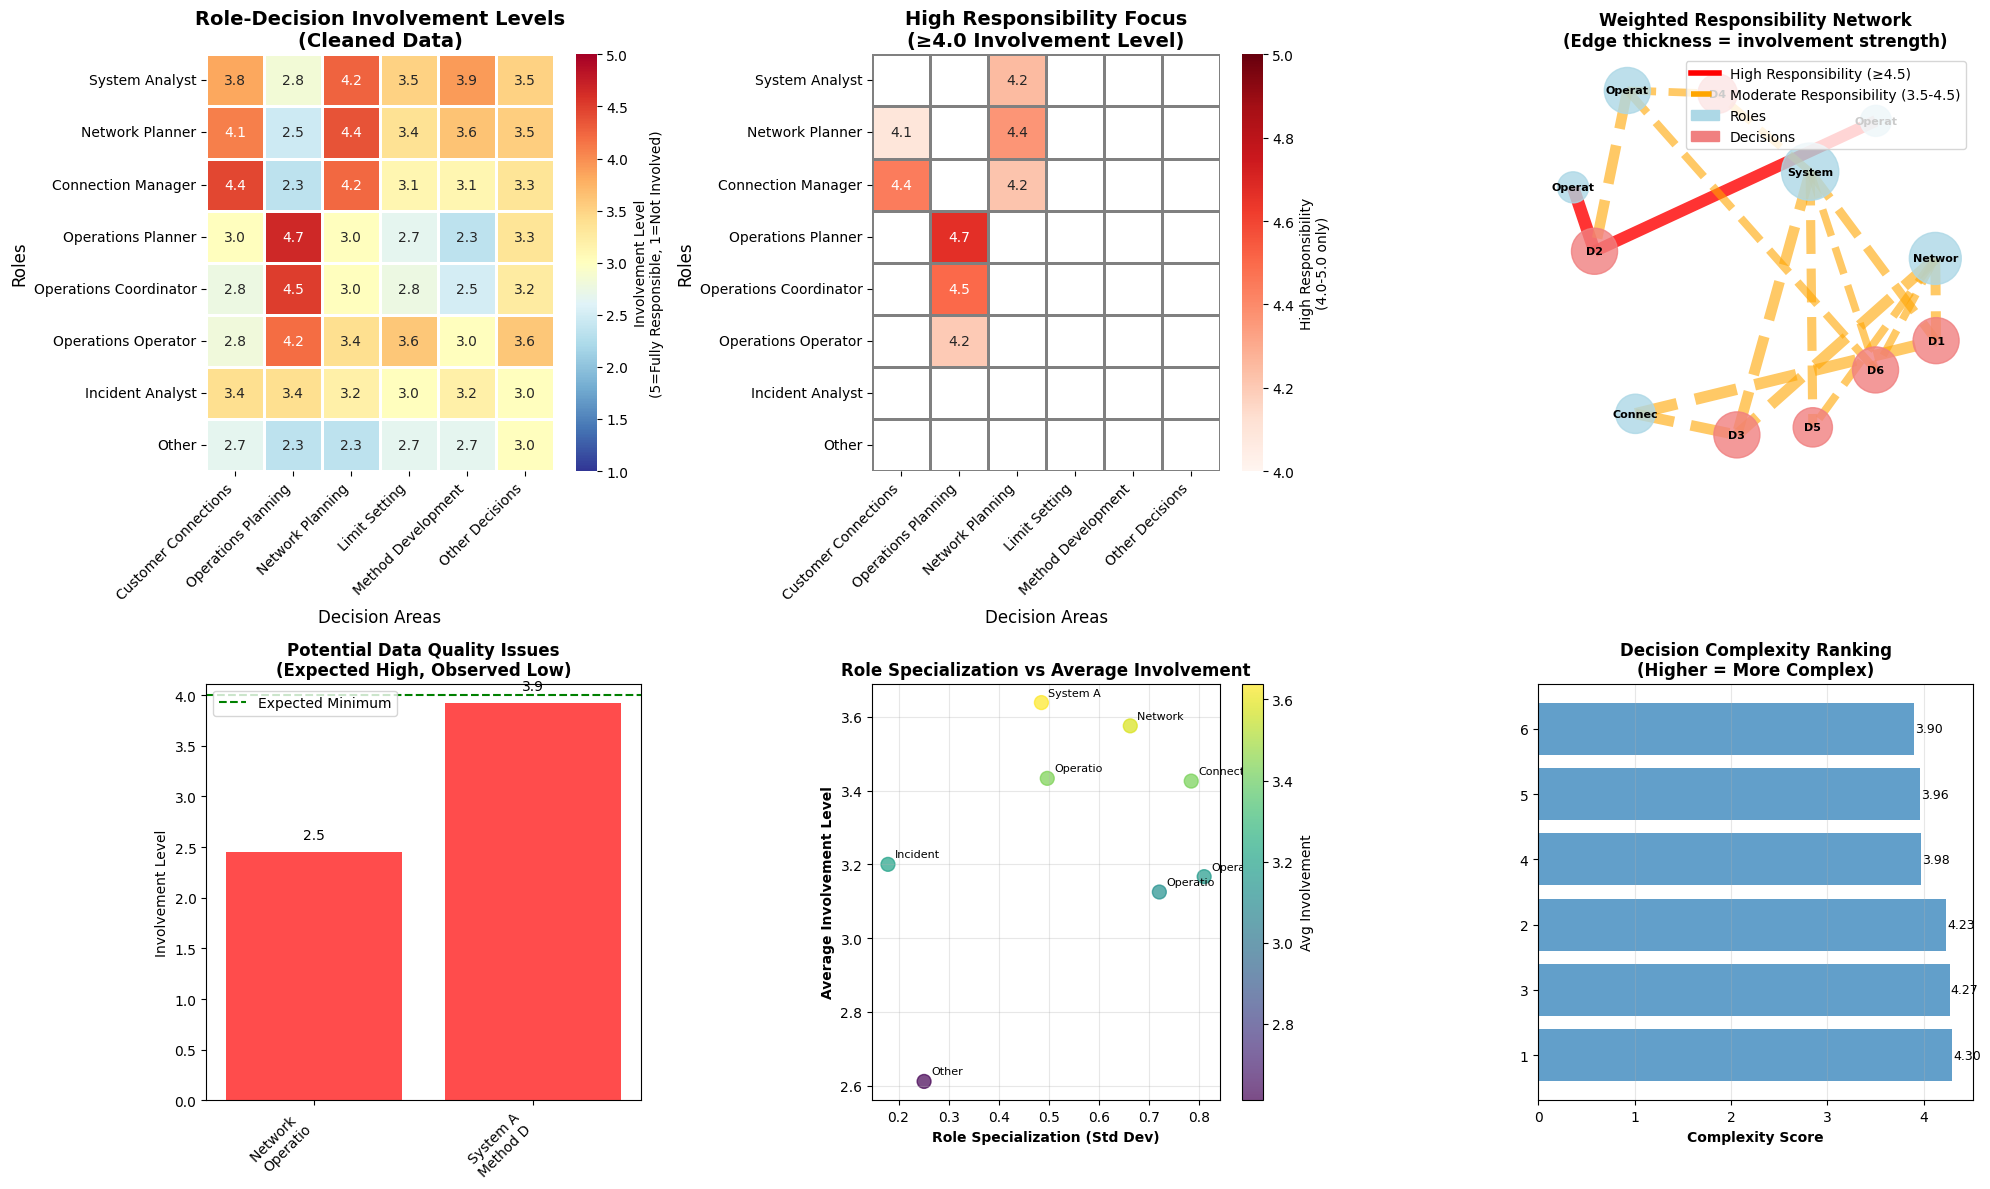


DATA QUALITY SUMMARY
⚠️  POTENTIAL DATA ISSUES FOUND:
   • Network Planner has low involvement (2.5) in Operations Planning
   • System Analyst has low involvement (3.9) in Method Development

💡 RECOMMENDATIONS:
   • Verify data collection and coding
   • Check if scale was correctly interpreted by respondents
   • Consider data validation with subject matter experts


In [27]:
# Cell: Improved Clean Visualizations
def create_clean_role_decision_visualizations(involvement_df, detailed_df, enhanced_df):
    """
    Create clean, interpretable visualizations with proper data validation
    """
    fig = plt.figure(figsize=(20, 12))
    
    # 1. CLEANED Involvement Level Heatmap
    plt.subplot(2, 3, 1)
    
    # Data validation and cleaning
    involvement_clean = involvement_df.copy()
    
    # Check for data quality issues
    print("Data Quality Check:")
    for col in involvement_clean.columns:
        for idx in involvement_clean.index:
            value = involvement_clean.loc[idx, col]
            if pd.notna(value):
                print(f"{idx} -> {col}: {value:.2f}")
    
    # Apply custom diverging color palette for better readability
    sns.heatmap(involvement_clean, 
                annot=True, 
                fmt='.1f', 
                cmap='RdYlBu_r',  # Reversed so red=high responsibility
                center=3,  # Set neutral point at moderate involvement
                vmin=1, 
                vmax=5,
                cbar_kws={'label': 'Involvement Level\n(5=Fully Responsible, 1=Not Involved)'},
                linewidths=1,
                linecolor='white')
    
    plt.title('Role-Decision Involvement Levels\n(Cleaned Data)', fontsize=14, fontweight='bold')
    plt.xlabel('Decision Areas', fontsize=12)
    plt.ylabel('Roles', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # 2. HIGH RESPONSIBILITY ONLY Heatmap (Filtered)
    plt.subplot(2, 3, 2)
    
    # Create filtered matrix showing only high responsibility (≥4.0)
    high_resp_only = involvement_clean.copy()
    high_resp_only[high_resp_only < 4.0] = np.nan  # Hide low responsibility
    
    # Custom color map: white for NaN/low, red gradient for high
    sns.heatmap(high_resp_only,
                annot=True,
                fmt='.1f',
                cmap='Reds',
                vmin=4.0,
                vmax=5.0,
                cbar_kws={'label': 'High Responsibility\n(4.0-5.0 only)'},
                linewidths=1,
                linecolor='gray')
    
    plt.title('High Responsibility Focus\n(≥4.0 Involvement Level)', fontsize=14, fontweight='bold')
    plt.xlabel('Decision Areas', fontsize=12)
    plt.ylabel('Roles', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    # 3. WEIGHTED Network Visualization
    plt.subplot(2, 3, 3)
    
    # Filter for meaningful connections with proper weighting
    network_data = detailed_df[
        (detailed_df['avg_involvement_level'] >= 3.5) &  # Only moderate+ involvement
        (detailed_df['role_total'] >= 2)  # Only roles with sufficient sample size
    ].copy()
    
    if len(network_data) > 0:
        # Calculate weighted responsibility score
        network_data['weight_score'] = (
            network_data['fully_responsible_pct'] * 1.0 +
            network_data['partially_responsible_pct'] * 0.7 +
            network_data['moderately_involved_pct'] * 0.4
        ) / 100  # Normalize to 0-1
        
        # Create NetworkX graph for better layout
        import networkx as nx
        
        G = nx.Graph()
        
        # Add nodes
        roles = network_data['role'].unique()
        decisions = network_data['decision_area'].unique()
        
        for role in roles:
            G.add_node(f"R_{role}", node_type='role')
        for decision in decisions:
            G.add_node(f"D_{decision}", node_type='decision')
        
        # Add weighted edges
        for _, row in network_data.iterrows():
            if row['weight_score'] > 0.1:  # Only significant connections
                G.add_edge(f"R_{row['role']}", f"D_{row['decision_area']}", 
                          weight=row['weight_score'],
                          involvement_level=row['avg_involvement_level'])
        
        # Create layout
        pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
        
        # Draw nodes with different colors and sizes
        role_nodes = [n for n in G.nodes() if n.startswith('R_')]
        decision_nodes = [n for n in G.nodes() if n.startswith('D_')]
        
        # Calculate node sizes based on total connections
        role_sizes = [G.degree(node) * 300 + 200 for node in role_nodes]
        decision_sizes = [G.degree(node) * 300 + 200 for node in decision_nodes]
        
        nx.draw_networkx_nodes(G, pos, nodelist=role_nodes, 
                              node_color='lightblue', node_size=role_sizes, alpha=0.8)
        nx.draw_networkx_nodes(G, pos, nodelist=decision_nodes, 
                              node_color='lightcoral', node_size=decision_sizes, alpha=0.8)
        
        # Draw weighted edges
        edges = G.edges(data=True)
        weights = [edge[2]['weight'] for edge in edges]
        involvement_levels = [edge[2]['involvement_level'] for edge in edges]
        
        # Different edge styles based on involvement level
        high_edges = [(u, v) for u, v, d in edges if d['involvement_level'] >= 4.5]
        med_edges = [(u, v) for u, v, d in edges if 3.5 <= d['involvement_level'] < 4.5]
        
        if high_edges:
            high_weights = [G[u][v]['weight'] * 10 for u, v in high_edges]
            nx.draw_networkx_edges(G, pos, edgelist=high_edges, width=high_weights,
                                  edge_color='red', alpha=0.8, style='-')
        
        if med_edges:
            med_weights = [G[u][v]['weight'] * 10 for u, v in med_edges]
            nx.draw_networkx_edges(G, pos, edgelist=med_edges, width=med_weights,
                                  edge_color='orange', alpha=0.6, style='--')
        
        # Add labels
        labels = {}
        for node in G.nodes():
            if node.startswith('R_'):
                labels[node] = node[2:8]  # Role name (truncated)
            else:
                labels[node] = f"D{node[2:]}"  # Decision number
        
        nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold')
        
        plt.title('Weighted Responsibility Network\n(Edge thickness = involvement strength)', 
                  fontsize=12, fontweight='bold')
        plt.axis('off')
        
        # Add legend
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], color='red', lw=4, label='High Responsibility (≥4.5)'),
            Line2D([0], [0], color='orange', lw=4, linestyle='--', label='Moderate Responsibility (3.5-4.5)'),
            plt.Circle((0,0), 0.1, color='lightblue', label='Roles'),
            plt.Circle((0,0), 0.1, color='lightcoral', label='Decisions')
        ]
        plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1, 1))
    
    # 4. Data Quality Analysis
    plt.subplot(2, 3, 4)
    
    # Check for counterintuitive results
    counterintuitive = []
    expected_high = [
        ('Connection Manager', 'Customer Connections'),
        ('Network Planner', 'Network Planning'),
        ('Operations Planner', 'Operations Planning'),
        ('System Analyst', 'Method Development')
    ]
    
    for role, decision in expected_high:
        if role in involvement_clean.index:
            # Find matching decision column
            decision_col = None
            for col in involvement_clean.columns:
                if any(word in col.lower() for word in decision.lower().split()):
                    decision_col = col
                    break
            
            if decision_col:
                value = involvement_clean.loc[role, decision_col]
                if pd.notna(value) and value < 4.0:
                    counterintuitive.append((role, decision_col, value))
    
    if counterintuitive:
        roles, decisions, values = zip(*counterintuitive)
        bars = plt.bar(range(len(counterintuitive)), values, color='red', alpha=0.7)
        plt.xticks(range(len(counterintuitive)), 
                   [f"{r[:8]}\n{d[:8]}" for r, d in zip(roles, decisions)], 
                   rotation=45, ha='right')
        plt.ylabel('Involvement Level')
        plt.title('Potential Data Quality Issues\n(Expected High, Observed Low)', fontweight='bold')
        plt.axhline(y=4.0, color='green', linestyle='--', label='Expected Minimum')
        plt.legend()
        
        # Add value labels
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'{value:.1f}', ha='center', va='bottom')
    
    # 5. Role Specialization Index
    plt.subplot(2, 3, 5)
    
    # Calculate specialization: high variance = specialist, low variance = generalist
    role_specialization = {}
    for role in involvement_clean.index:
        role_values = involvement_clean.loc[role].dropna()
        if len(role_values) > 1:
            specialization = role_values.std()  # Higher std = more specialized
            avg_involvement = role_values.mean()
            role_specialization[role] = {
                'specialization': specialization,
                'avg_involvement': avg_involvement
            }
    
    if role_specialization:
        roles = list(role_specialization.keys())
        specializations = [role_specialization[r]['specialization'] for r in roles]
        avg_involvements = [role_specialization[r]['avg_involvement'] for r in roles]
        
        scatter = plt.scatter(specializations, avg_involvements, s=100, alpha=0.7, c=avg_involvements, cmap='viridis')
        
        for i, role in enumerate(roles):
            plt.annotate(role[:8], (specializations[i], avg_involvements[i]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=8)
        
        plt.xlabel('Role Specialization (Std Dev)', fontweight='bold')
        plt.ylabel('Average Involvement Level', fontweight='bold')
        plt.title('Role Specialization vs Average Involvement', fontweight='bold')
        plt.colorbar(scatter, label='Avg Involvement')
        plt.grid(alpha=0.3)
    
    # 6. Decision Complexity Ranking
    plt.subplot(2, 3, 6)
    
    decision_complexity = detailed_df.groupby('decision_area').agg({
        'avg_involvement_level': 'mean',
        'role': 'count',  # Number of roles involved
        'fully_responsible_pct': 'sum'  # Total responsibility
    }).round(2)
    
    decision_complexity['complexity_score'] = (
        decision_complexity['avg_involvement_level'] * 0.4 +
        decision_complexity['role'] * 0.3 +
        decision_complexity['fully_responsible_pct'] / 100 * 0.3
    )
    
    decision_complexity = decision_complexity.sort_values('complexity_score', ascending=False)
    
    bars = plt.barh(range(len(decision_complexity)), decision_complexity['complexity_score'], alpha=0.7)
    plt.yticks(range(len(decision_complexity)), decision_complexity.index)
    plt.xlabel('Complexity Score', fontweight='bold')
    plt.title('Decision Complexity Ranking\n(Higher = More Complex)', fontweight='bold')
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
                ha='left', va='center', fontsize=9)
    
    plt.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print data quality summary
    print("\n" + "="*60)
    print("DATA QUALITY SUMMARY")
    print("="*60)
    
    if counterintuitive:
        print("⚠️  POTENTIAL DATA ISSUES FOUND:")
        for role, decision, value in counterintuitive:
            print(f"   • {role} has low involvement ({value:.1f}) in {decision}")
        print("\n💡 RECOMMENDATIONS:")
        print("   • Verify data collection and coding")
        print("   • Check if scale was correctly interpreted by respondents")
        print("   • Consider data validation with subject matter experts")
    else:
        print("✅ No obvious data quality issues detected")

# Create improved visualizations
create_clean_role_decision_visualizations(involvement_df, detailed_df, enhanced_df)


In [30]:
# Cell: Calculate Weighted Involvement for Parallel Coordinates
def calculate_weighted_involvement_for_plot(detailed_df):
    """
    Calculate weighted involvement as frequency * average involvement level
    for each role-decision combination
    """
    # Group by role and decision area to get frequency and average involvement
    weighted_data = detailed_df.groupby(['role', 'decision_area']).agg({
        'avg_involvement_level': 'mean',  # Average involvement level
        'role_total': 'first'  # Get role total (should be same for each role)
    }).reset_index()
    
    # Calculate frequency of each role-decision combination
    frequency = detailed_df.groupby(['role', 'decision_area']).size().reset_index(name='frequency')
    
    # Merge frequency with involvement data
    weighted_data = pd.merge(weighted_data, frequency, on=['role', 'decision_area'])
    
    # Calculate weighted involvement
    weighted_data['weighted_involvement'] = (
        weighted_data['frequency'] * weighted_data['avg_involvement_level']
    )
    
    # Normalize weighted involvement for better visualization (0-1 scale)
    max_weight = weighted_data['weighted_involvement'].max()
    weighted_data['weighted_involvement_norm'] = (
        weighted_data['weighted_involvement'] / max_weight if max_weight > 0 else 0
    )
    
    return weighted_data

# Apply to your cleaned data
weighted_involvement_df = calculate_weighted_involvement_for_plot(detailed_df)


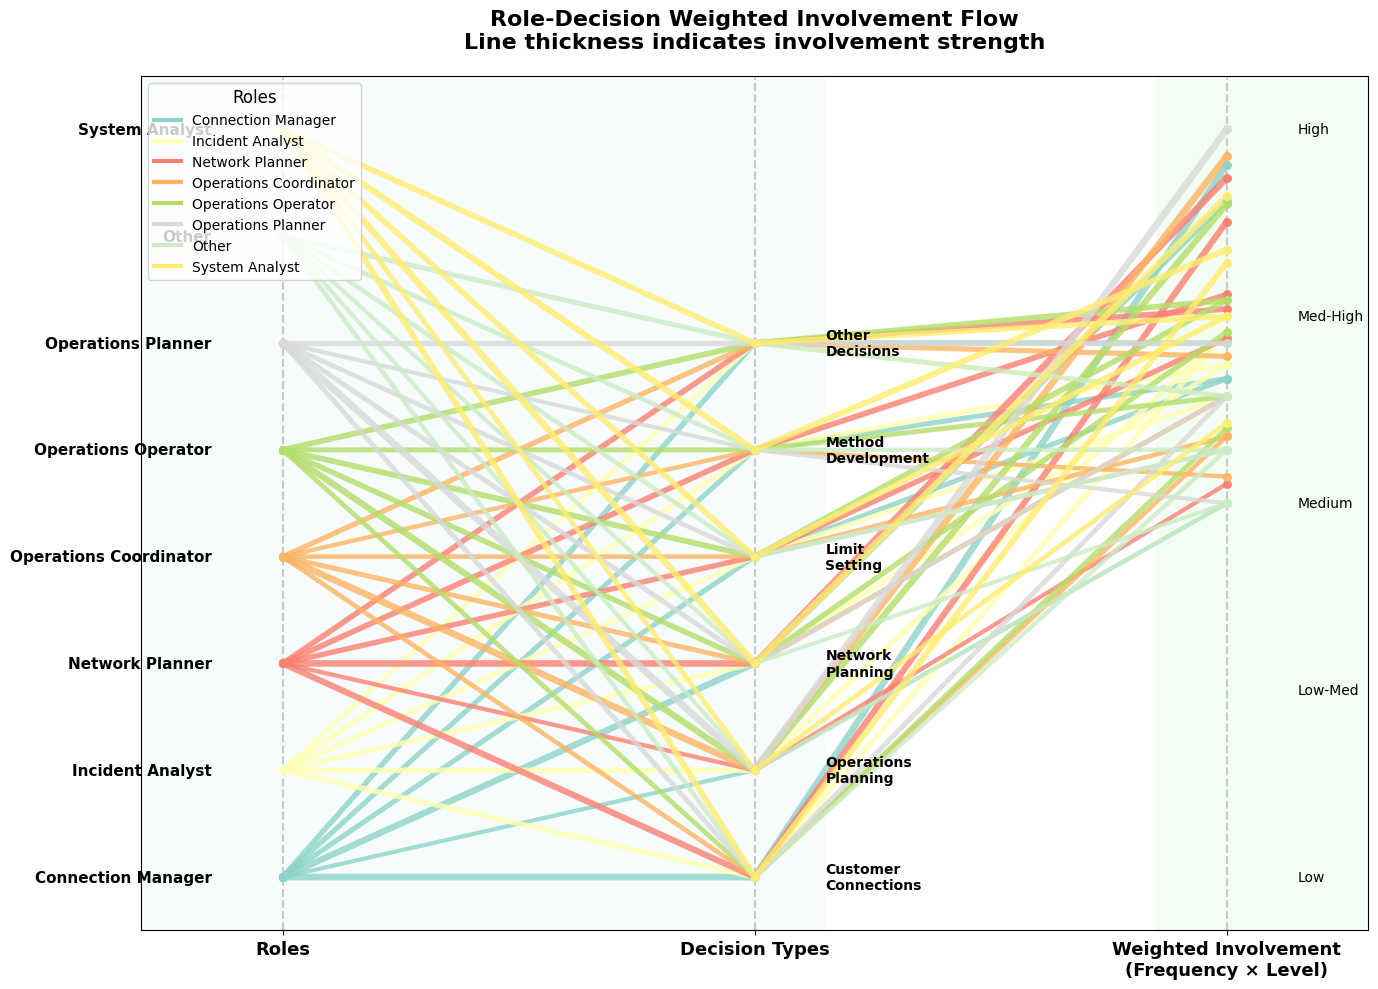

In [31]:
# Cell: Create Weighted Involvement Parallel Coordinates Plot
def create_weighted_parallel_coordinates(weighted_df):
    """
    Create parallel coordinates plot showing Role → Decision Type → Weighted Involvement
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Prepare data
    unique_roles = weighted_df['role'].unique()
    unique_decisions = weighted_df['decision_area'].unique()
    
    # Create mappings for categorical variables
    role_mapping = {role: i for i, role in enumerate(unique_roles)}
    decision_mapping = {decision: i for i, decision in enumerate(unique_decisions)}
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Define axis positions
    axis_positions = [0, 1, 2]
    axis_labels = ['Roles', 'Decision Types', 'Weighted Involvement\n(Frequency × Level)']
    
    # Color mapping for roles
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_roles)))
    role_colors = {role: colors[i] for i, role in enumerate(unique_roles)}
    
    # Plot lines for each role-decision combination
    for _, row in weighted_df.iterrows():
        role_y = role_mapping[row['role']]
        decision_y = decision_mapping[row['decision_area']]
        
        # Scale weighted involvement to fit the plot range
        max_y = max(len(unique_roles), len(unique_decisions)) - 1
        weighted_y = row['weighted_involvement_norm'] * max_y
        
        # Create line coordinates
        x_coords = axis_positions
        y_coords = [role_y, decision_y, weighted_y]
        
        # Line thickness based on weighted involvement
        line_width = 1 + (row['weighted_involvement_norm'] * 4)  # 1-5 range
        
        # Plot the line
        ax.plot(x_coords, y_coords, 
               color=role_colors[row['role']], 
               alpha=0.8, 
               linewidth=line_width)
        
        # Add small circles at connection points
        ax.scatter(x_coords, y_coords, 
                  color=role_colors[row['role']], 
                  s=30, alpha=0.9, zorder=5)
    
    # Customize the plot
    ax.set_xlim(-0.3, 2.3)
    ax.set_ylim(-0.5, max(len(unique_roles), len(unique_decisions)) - 0.5)
    ax.set_xticks(axis_positions)
    ax.set_xticklabels(axis_labels, fontsize=13, fontweight='bold')
    
    # Add vertical reference lines
    for pos in axis_positions:
        ax.axvline(x=pos, color='gray', linestyle='--', alpha=0.4, zorder=1)
    
    # Add role labels on the left
    for role, y_pos in role_mapping.items():
        ax.text(-0.15, y_pos, role, ha='right', va='center', 
               fontsize=11, fontweight='bold')
    
    # Add decision type labels in the middle
    decision_area_labels = {
        '1': 'Customer\nConnections',
        '2': 'Operations\nPlanning', 
        '3': 'Network\nPlanning',
        '4': 'Limit\nSetting',
        '5': 'Method\nDevelopment',
        '6': 'Other\nDecisions'
    }
    
    for decision, y_pos in decision_mapping.items():
        label = decision_area_labels.get(decision, f"Decision {decision}")
        ax.text(1.15, y_pos, label, ha='left', va='center', 
               fontsize=10, fontweight='bold')
    
    # Add weighted involvement scale labels on the right
    scale_positions = np.linspace(0, max_y, 5)
    scale_labels = ['Low', 'Low-Med', 'Medium', 'Med-High', 'High']
    
    for pos, label in zip(scale_positions, scale_labels):
        ax.text(2.15, pos, label, ha='left', va='center', fontsize=10)
    
    # Remove y-axis ticks and labels
    ax.set_yticks([])
    ax.set_ylabel('')
    
    # Add title and styling
    ax.set_title('Role-Decision Weighted Involvement Flow\n' + 
                'Line thickness indicates involvement strength', 
                fontsize=16, fontweight='bold', pad=20)
    
    # Create legend for roles
    legend_elements = [
        plt.Line2D([0], [0], color=role_colors[role], lw=3, label=role) 
        for role in unique_roles
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1), 
             title='Roles', title_fontsize=12, fontsize=10)
    
    # Add background shading for better visual separation
    from matplotlib.patches import Rectangle
    ax.add_patch(Rectangle((-0.3, -0.5), 1.45, len(unique_roles), 
                          facecolor='lightblue', alpha=0.1, zorder=0))
    ax.add_patch(Rectangle((1.85, -0.5), 0.45, max_y + 1, 
                          facecolor='lightgreen', alpha=0.1, zorder=0))
    
    plt.tight_layout()
    plt.show()
    
    return weighted_df

# Create the enhanced visualization
plot_data = create_weighted_parallel_coordinates(weighted_involvement_df)


In [32]:
# Expandable Sankey Framework Structure
def create_expandable_sankey_framework(df_cleaned):
    """
    Create expandable Sankey diagram framework for role-decision-method-barrier analysis
    """
    import plotly.graph_objects as go
    import plotly.express as px
    from plotly.subplots import make_subplots
    
    # Define expandable node structure
    node_categories = {
        'roles': ['System Analyst', 'Network Planner', 'Connection Manager', 
                 'Operations Planner', 'Operations Coordinator', 'Operations Operator', 
                 'Incident Analyst', 'Other'],
        'decisions': ['Customer Connections', 'Operations Planning', 'Network Planning', 
                     'Limit Setting', 'Method Development', 'Other Decisions'],
        'involvement_levels': ['High Involvement (4-5)', 'Moderate Involvement (3-4)', 
                              'Low Involvement (1-3)'],
        # Future expansion ready
        'methods': [],  # To be populated when methods data is available
        'tools': [],    # To be populated when tools data is available  
        'barriers': []  # To be populated when barriers data is available
    }
    
    # Calculate weighted flows between categories
    flows = calculate_weighted_flows(df_cleaned, node_categories)
    
    return create_interactive_sankey(flows, node_categories)

def calculate_weighted_flows(df, node_categories):
    """
    Calculate weighted flows based on involvement levels
    """
    flows = []
    
    # Role → Decision flows (weighted by involvement)
    for _, row in df.iterrows():
        if row['avg_involvement_level'] >= 3.0:  # Only meaningful involvement
            weight = row['avg_involvement_level'] * row['role_total']
            flows.append({
                'source': row['role'],
                'target': row['decision_area'], 
                'value': weight,
                'involvement_level': row['avg_involvement_level']
            })
    
    return flows


In [37]:
# Updated Phase 1: Sankey with Decision Short Names
def create_phase1_sankey_with_labels(weighted_involvement_df):
    """
    Create Sankey showing roles, decisions (with descriptive names), and involvement levels
    """
    import plotly.graph_objects as go
    
    # Define decision area mapping to short descriptive names
    decision_short_names = {
        '1': 'Customer Connections',
        '2': 'Operations Planning', 
        '3': 'Network Planning',
        '4': 'Limit Setting',
        '5': 'Method Development',
        '6': 'Other Decisions'
    }
    
    # Apply decision short names to the data
    df_with_labels = weighted_involvement_df.copy()
    df_with_labels['decision_short_name'] = df_with_labels['decision_area'].map(
        lambda x: decision_short_names.get(str(x), f"Decision {x}")
    )
    
    # Prepare nodes
    roles = df_with_labels['role'].unique().tolist()
    decisions = df_with_labels['decision_short_name'].unique().tolist()
    involvement_categories = ['High Involvement (4-5)', 'Moderate Involvement (3-4)', 'Low Involvement (1-3)']
    
    # Combine all nodes in order: Roles → Decisions → Involvement Levels
    all_nodes = roles + decisions + involvement_categories
    
    # Create node mapping
    node_dict = {node: idx for idx, node in enumerate(all_nodes)}
    
    # Prepare links with weighted involvement
    links = []
    
    for _, row in df_with_labels.iterrows():
        if row['weighted_involvement'] > 0:  # Only include meaningful connections
            
            # Role → Decision link
            links.append({
                'source': node_dict[row['role']],
                'target': node_dict[row['decision_short_name']],
                'value': row['weighted_involvement'],
                'color': get_involvement_color(row['avg_involvement_level'])
            })
            
            # Decision → Involvement Level link
            involvement_category = categorize_involvement(row['avg_involvement_level'])
            links.append({
                'source': node_dict[row['decision_short_name']],
                'target': node_dict[involvement_category],
                'value': row['weighted_involvement'],
                'color': get_involvement_color(row['avg_involvement_level'])
            })
    
    # Define node colors for better visual separation
    node_colors = []
    for node in all_nodes:
        if node in roles:
            node_colors.append('lightblue')
        elif node in decisions:
            node_colors.append('lightcoral')
        else:  # involvement categories
            node_colors.append('lightgreen')
    
    # Create Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_nodes,
            color=node_colors
        ),
        link=dict(
            source=[link['source'] for link in links],
            target=[link['target'] for link in links],
            value=[link['value'] for link in links],
            color=[link['color'] for link in links]
        )
    )])
    
    fig.update_layout(
        title_text="Role-Decision-Involvement Flow Analysis<br>" +
                  "Norwegian Grid Companies (with Decision Names)",
        font_size=12,
        height=700,
        width=1200
    )
    
    return fig

def get_involvement_color(level):
    """Map involvement level to color with transparency"""
    if level >= 4.5:
        return 'rgba(220, 20, 60, 0.6)'    # Crimson for high involvement
    elif level >= 3.5:
        return 'rgba(255, 140, 0, 0.6)'    # Dark orange for moderate
    elif level >= 2.5:
        return 'rgba(70, 130, 180, 0.6)'   # Steel blue for low-moderate
    else:
        return 'rgba(169, 169, 169, 0.6)'  # Gray for minimal involvement

def categorize_involvement(level):
    """Categorize involvement level with clear thresholds"""
    if level >= 4.0:
        return 'High Involvement (4-5)'
    elif level >= 3.0:
        return 'Moderate Involvement (3-4)'
    else:
        return 'Low Involvement (1-3)'




In [38]:
# Create the visualization with decision names
fig = create_phase1_sankey_with_labels(weighted_involvement_df)
fig.show()